# Breast Cancer Detection - Using Classification Models

The accuracy of classification is compared using three different models - **KNN (non-standardized data), KNN (standardized data) and Decision Tree Classifier**. Then, the features that best describe the dataset is chosen using **feature selection** and the best k-value is also determined. Finally, The model with the best accuracy is chosen. In this case, it is using the **KNN classifier with standardized data**.

In [ ]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

In [ ]:
# overview of dataset
print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
feature_data = dataset.data
target_data = dataset.target
feature_names = dataset.feature_names
target_names = dataset.target_names

df = pd.DataFrame(data = feature_data, columns = feature_names)
df['target'] = target_data
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
print('Number of features:', len(feature_names))
area_over_700 = df[df['mean area']>700].count()['mean area']
print('Number of observations with mean area over 700:',area_over_700)


# To check the target data and corresponding target names
# print('Target data classes:',np.unique(target_data),'\nTarget data names:',target_names)


malignant_samples = df[df['target'] == 0].count()['target']
print('Number of "Malignant" samples:',malignant_samples)
benign_samples = df[df['target'] == 1].count()['target']
print('Number of "Benign" samples:', benign_samples)

Number of features: 30
Number of observations with mean area over 700: 171
Number of "Malignant" samples: 212
Number of "Benign" samples: 357


In [ ]:
#splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
X = feature_data
y = target_data
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size = 0.3, random_state = 0)

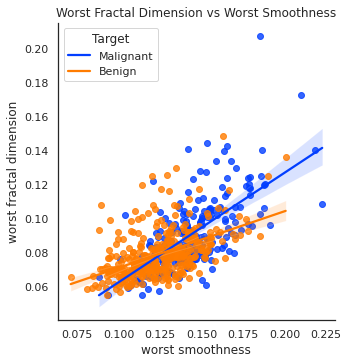

In [ ]:
import seaborn as sns;
sns.set_theme(style = 'white', palette = 'bright', color_codes = True)
plot = sns.lmplot(x = 'worst smoothness', y = 'worst fractal dimension', hue = 'target', data = df,legend = False)
plt.title('Worst Fractal Dimension vs Worst Smoothness')
plt.legend(title = 'Target',labels = ['Malignant','Benign'])
plt.show()

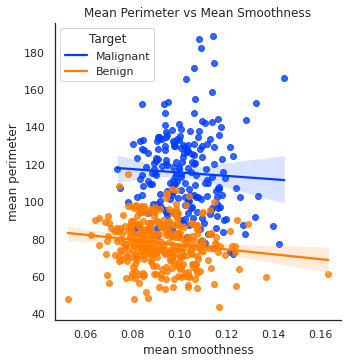

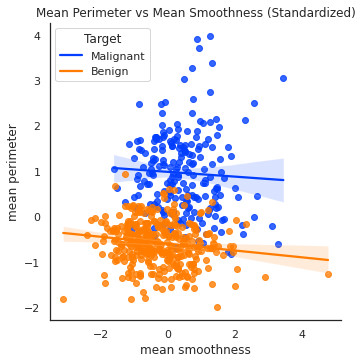

In [ ]:
#standardizing the data

from sklearn.preprocessing import StandardScaler

#non-standardized plot with two features having different scales, mean smoothness and mean perimeter
plot1 = sns.lmplot(x = 'mean smoothness', y = 'mean perimeter', hue = 'target', data = df, legend = False)
plt.title('Mean Perimeter vs Mean Smoothness')
plt.legend(title = 'Target', labels = ['Malignant','Benign'])

#standardizing using StandardScaler
scaler = StandardScaler()         
df_standardized = df.copy()
df_standardized[['mean smoothness','mean perimeter']] = scaler.fit_transform(df_standardized[['mean smoothness','mean perimeter']])

#standadized plot
plot1_std = sns.lmplot(x = 'mean smoothness', y = 'mean perimeter', hue = 'target', data = df_standardized, legend = False)
plt.title('Mean Perimeter vs Mean Smoothness (Standardized)')
plt.legend(title = 'Target', labels = ['Malignant','Benign'])

plt.show()

## 1. Using All Features (Non-Standardized Data)

In [ ]:
#performing knn classification on non-standardized data
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

accuracy = []
k = np.arange(1,101)

for i in range(1,101):
  knn1 = neighbors.KNeighborsClassifier(n_neighbors = i)
  scores = cross_val_score(knn1, X_train, y_train, cv = 5)
  accuracy.append(scores.mean())
max_acc = max(accuracy)

# finding max accuracy of non-standardized data when knn classifier is used and all features are present 
print('Maximum Accuracy: {} %'.format(max_acc*100))
print('k-value corresponding to maximum accuracy:',accuracy.index(max_acc)+1) #as index in list starts from 0, k value = index value + 1
# print(accuracy)

Maximum Accuracy: 93.46518987341771 %
k-value corresponding to maximum accuracy: 10


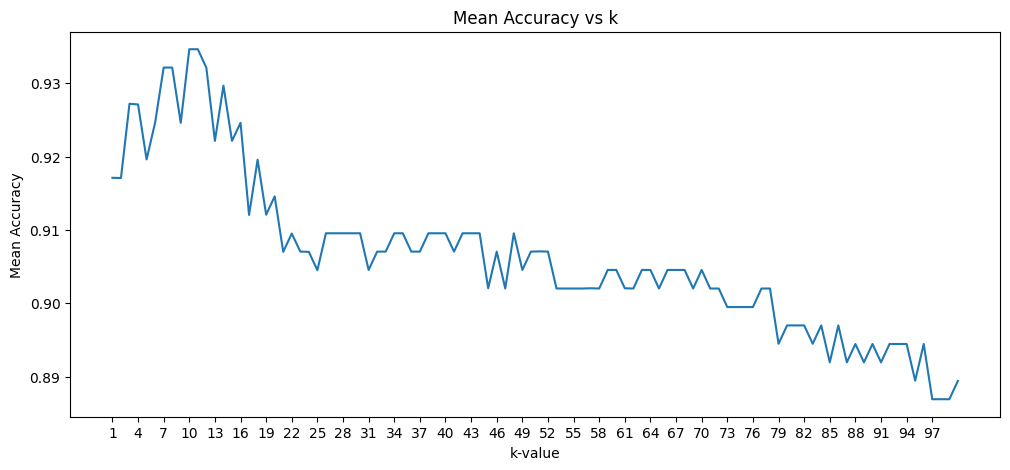

In [ ]:
# plot for visualizing mean accuracies and corresponding k values
plt.style.use('default')
plt_size = plt.figure(figsize=(12, 5))
plt.plot(k,accuracy)
plt.title('Mean Accuracy vs k')
plt.xlabel('k-value')
plt.ylabel('Mean Accuracy')
plt.xticks(np.arange(min(k),max(k),step = 3))

plt.show()

In [ ]:
#finding what ranges of k lead to underfitting and overfitting 

train_accuracy = []
test_accuracy = []
k_val = np.arange(1,101)

for j in range(1,101):
  knn2 = neighbors.KNeighborsClassifier(n_neighbors = j)
  score = cross_validate(knn2, X_train, y_train, cv = 5, return_train_score = True)
  train_accuracy.append(score['train_score'].mean())
  test_accuracy.append(score['test_score'].mean())
# print('Training Accuracy:',train_accuracy)
# print('Validation Accuracy:',val_accuracy)
train_error = 1 - np.array(train_accuracy)
# print('Training Error:',train_error)
test_error = 1 - np.array(test_accuracy)
# print('Validation Error:',val_error)

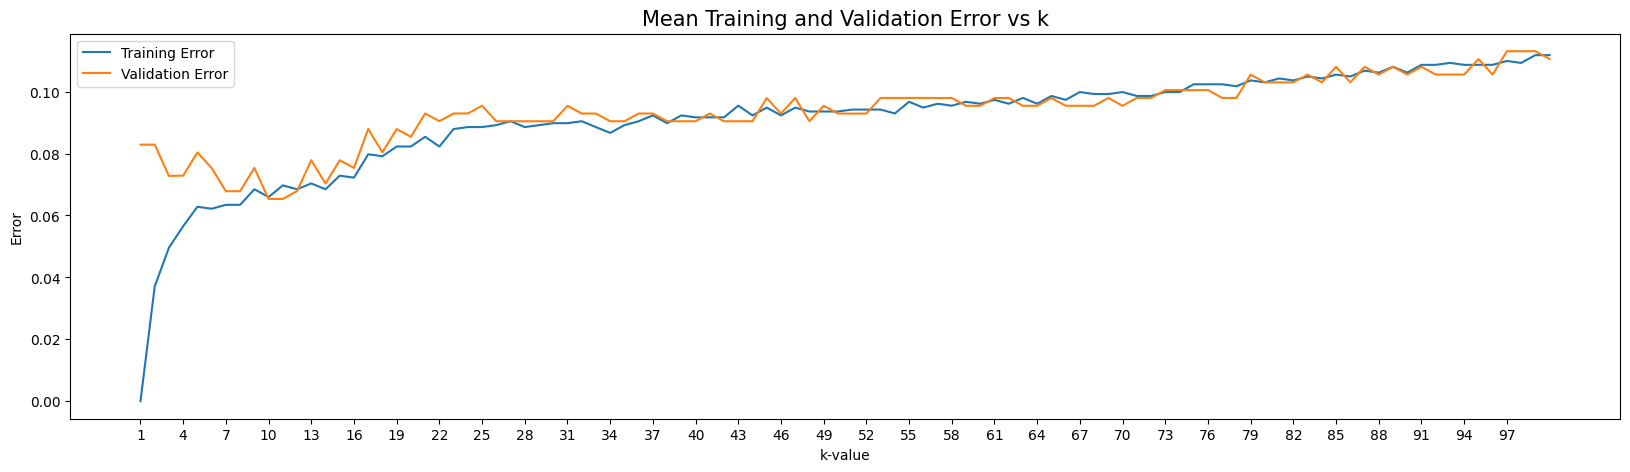

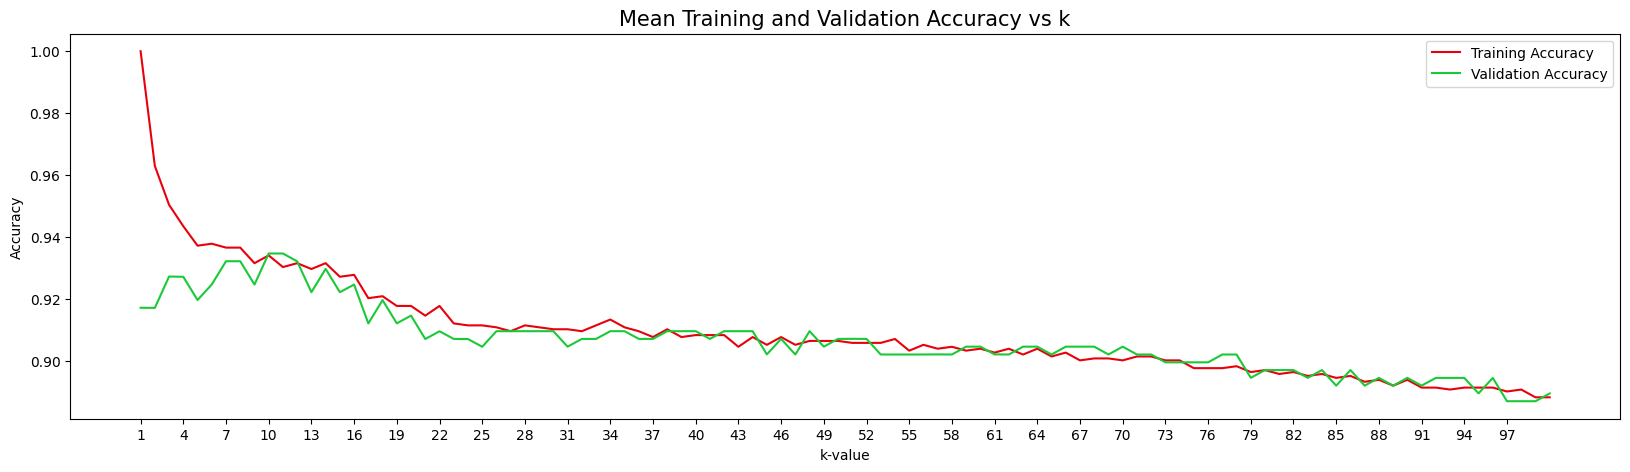

In [ ]:
#plotting the error graph
x_err = k_val
y1_err = train_error
y2_err = test_error
plt_1 = plt.figure(figsize=(20, 5))
plt.plot(x_err,y1_err, label = 'Training Error')
plt.plot(x_err,y2_err, label = 'Validation Error')
plt.xlabel('k-value')
plt.ylabel('Error')
plt.xticks(np.arange(min(x_err),max(x_err),step = 3))
plt.title('Mean Training and Validation Error vs k', size = 15)
plt.legend()

#plotting the accuracy graph
x_acc = k_val
y1_acc = train_accuracy
y2_acc = test_accuracy
plt_2 = plt.figure(figsize=(20, 5))
plt.plot(x_acc,y1_acc, color = 'r', label = 'Training Accuracy')
plt.plot(x_acc,y2_acc, color = 'g', label = 'Validation Accuracy')
plt.xlabel('k-value')
plt.ylabel('Accuracy')
plt.xticks(np.arange(min(x_acc),max(x_acc),step = 3))
plt.title('Mean Training and Validation Accuracy vs k', size = 15)
plt.legend()

plt.show()

In [ ]:
# feature selection
# defining a function for knn classifier

def knn_func (X_train, y_train):
  knn_accuracy = []
  kval = range(1,101)
  for k in kval:
    knn3 = neighbors.KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn3, X_train, y_train, cv = 5)
    knn_accuracy.append(scores.mean())
  max_accuracy = max(knn_accuracy)
  max_k_index = knn_accuracy.index(max_accuracy)+1
  return max_accuracy, max_k_index

## 2. Feature Selection 

### 2a. KNN Classifier with Non-Standardized Data

In [ ]:
# defining a function to select features based on importance

from sklearn import tree

def Feature_selector (X_train , y_train , tr=0.95):
  dt = tree.DecisionTreeClassifier(random_state = 0)
  fit_dt = dt.fit(X_train, y_train)
  importance = dt.feature_importances_

  all_features_acc = 0.9346518987341772   #max accuracy from full feature cross validation 
  feature_names = dataset.feature_names

  # print(importance)
  # indices = np.argsort(importance)
  # print(indices)

  total_features = len(feature_names)
  tr_acc = tr*all_features_acc    #tr = 0.95

  removed_feat = []
  knn_acc = []
  knn_k = []

  acc_initial = 100.0
  i = 0

  while (i<(total_features-1) and  (acc_initial > tr_acc)):
    to_be_removed = np.where(importance == np.amin(importance))
    # print('Removed:',to_be_removed)
    importance = np.delete(importance, to_be_removed[0][0])
    # print('Importance:',importance)
    X_train = np.delete(X_train, to_be_removed[0][0], axis =1)
    # print('Data:',X_train)
    feature_for_removal = feature_names[to_be_removed[0][0]]
    # print('Feature:',feature_for_removal)
    feature_names = np.delete(feature_names,to_be_removed[0][0])

#calling the knn function
    acc, kvalue = knn_func(X_train,y_train)
    removed_feat.append(feature_for_removal)
    knn_acc.append(acc)
    knn_k.append(kvalue)
    i += 1
  return removed_feat, knn_acc, knn_k

In [ ]:
removed_features, acc_for_features, k_for_features = Feature_selector(X_train,y_train)
arr1 = np.array(removed_features)
arr2 = np.array(acc_for_features)
arr3 = np.array(k_for_features)

In [ ]:
print('Removed Features:\n',arr1)
print('Accuracies:\n',arr2)
print('Corresponding k-values for Accuracies:\n',arr3)

Removed Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concave points'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'worst radius' 'worst perimeter' 'worst compactness'
 'worst fractal dimension' 'worst smoothness' 'fractal dimension error'
 'worst concavity' 'smoothness error' 'mean symmetry' 'mean concavity'
 'worst texture' 'worst symmetry' 'area error' 'worst area']
Accuracies:
 [0.9346519  0.9346519  0.9321519  0.91458861 0.91458861 0.91458861
 0.91458861 0.91458861 0.91458861 0.91458861 0.91458861 0.91458861
 0.91458861 0.91458861 0.91458861 0.91458861 0.91455696 0.91455696
 0.91455696 0.91455696 0.91455696 0.91455696 0.91455696 0.91455696
 0.91455696 0.91455696 0.91455696 0.91458861 0.92462025]
Corresponding k-values for Accuracies:
 [10 10  7 34 34 34 34 34 34 34 34 34 34 34 34 34 61 61 61 61 61 61 61 61

In [ ]:
# for i in range(len(removed_features)):
#   print('{}. When "{}" is removed, mean cross-validation accuracy = {} and is obtained at k = {}'.format(i+1, removed_features[i], acc_for_features[i], k_for_features[i]))

#tabulating using a dataframe
df_knn = pd.DataFrame({'removed_feature': arr1, 'mean_cv_accuracy': arr2, 'k_value': arr3})
df_knn

,removed_feature,mean_cv_accuracy,k_value
0,mean radius,0.934652,10
1,mean texture,0.934652,10
2,mean perimeter,0.932152,7
3,mean area,0.914589,34
4,mean smoothness,0.914589,34
5,mean compactness,0.914589,34
6,mean concave points,0.914589,34
7,mean fractal dimension,0.914589,34
8,radius error,0.914589,34
9,texture error,0.914589,34


In [ ]:
#finding max accuracy of non-standardized data when decision tree classifier is used to remove less important features
print('Maximum Accuracy: {} %'.format(max(acc_for_features)*100))
index1 = acc_for_features.index(max(acc_for_features))
# print(index1+1)
print('k-value corresponding maximum accuracy:',k_for_features[index1])

# print('\nMaximum accuracy is obtained when 28 to 30 (full) features are present')

Maximum Accuracy: 93.46518987341771 %
k-value corresponding maximum accuracy: 10


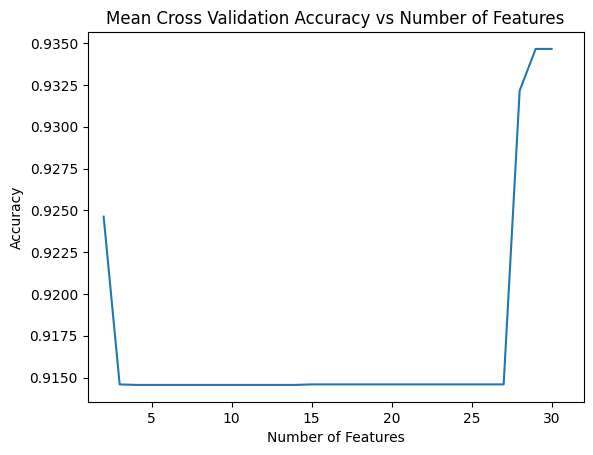

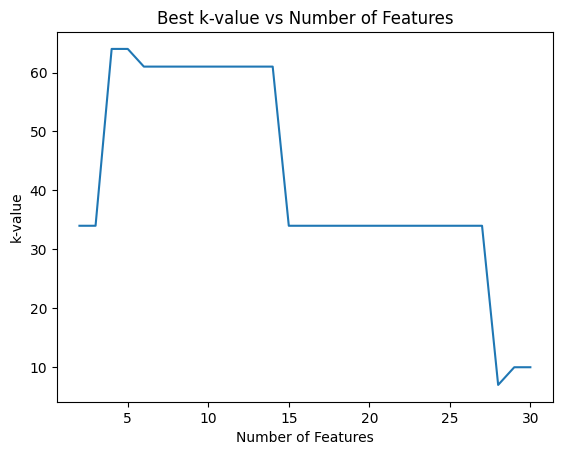

In [ ]:
#plots

# cv accuracy vs features
x_val = range(30,1,-1)
# plt.figure(figsize=(10, 5))
plt.plot(x_val,arr2)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.xlim(1,32)
plt.title('Mean Cross Validation Accuracy vs Number of Features')
plt.show()

# k-value vs features
plt.plot(x_val,arr3)
plt.xlabel('Number of Features')
plt.ylabel('k-value')
plt.title('Best k-value vs Number of Features')
plt.show()

### 2b. KNN Classifier with Standardized Data

In [ ]:
from sklearn.preprocessing import StandardScaler

#standardizing feature data 
scaler2 = StandardScaler()
scaler2.fit(X_train)
# print(X_train.shape)
# print(X_test.shape)
X_train_scaled = scaler2.transform(X_train)
X_test_scaled  = scaler2.transform(X_test)

NameError: ignored

In [ ]:
removed_features_scaled, acc_for_features_scaled, k_for_features_scaled = Feature_selector(X_train_scaled, y_train)
arr1_scaled = np.array(removed_features_scaled)
arr2_scaled = np.array(acc_for_features_scaled)
arr3_scaled = np.array(k_for_features_scaled)

In [ ]:
print('Removed Features:\n',arr1_scaled)
print('Accuracies:\n',arr2_scaled)
print('Corresponding k-values for Accuracies:\n',arr3_scaled)

Removed Features:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concave points'
 'mean fractal dimension' 'radius error' 'texture error' 'perimeter error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'worst radius' 'worst perimeter' 'worst compactness'
 'worst fractal dimension' 'worst smoothness' 'fractal dimension error'
 'worst concavity' 'smoothness error' 'mean symmetry' 'mean concavity'
 'worst texture' 'worst symmetry' 'area error' 'worst area']
Accuracies:
 [0.96496835 0.96234177 0.95984177 0.95984177 0.95724684 0.96234177
 0.95981013 0.95984177 0.95734177 0.95981013 0.95990506 0.96231013
 0.95981013 0.96484177 0.96740506 0.96231013 0.95471519 0.95224684
 0.95981013 0.95731013 0.95737342 0.95490506 0.95990506 0.96743671
 0.96737342 0.95731013 0.95727848 0.9496519  0.92462025]
Corresponding k-values for Accuracies:
 [ 8  4  8  8  5  7  8  8  8  6 12  4  3  4  6  3  3  4  6  6 12 20  6  4

In [ ]:
#tabulating results
df_knn_std = pd.DataFrame({'removed_feature': arr1_scaled, 'mean_cv_accuracy_standardized': arr2_scaled, 'k_value': arr3_scaled})
df_knn_std

,removed_feature,mean_cv_accuracy_standardized,k_value
0,mean radius,0.964968,8
1,mean texture,0.962342,4
2,mean perimeter,0.959842,8
3,mean area,0.959842,8
4,mean smoothness,0.957247,5
5,mean compactness,0.962342,7
6,mean concave points,0.959810,8
7,mean fractal dimension,0.959842,8
8,radius error,0.957342,8
9,texture error,0.959810,6


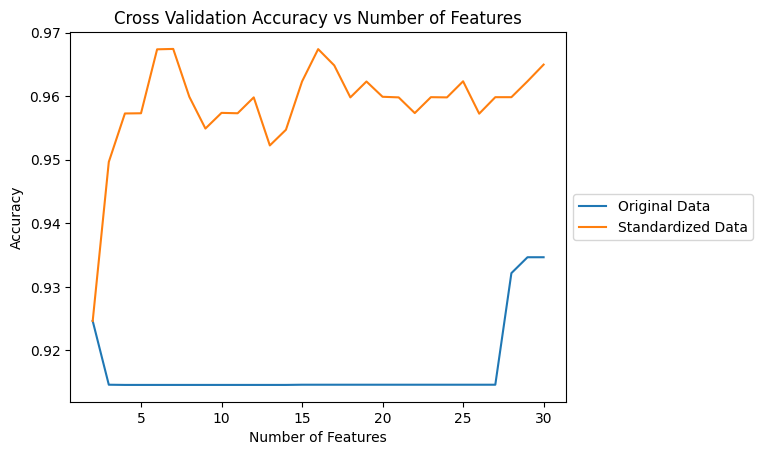

In [ ]:
x_value = range(30,1,-1)
plt.plot(x_value,arr2, label = 'Original Data')
plt.plot(x_value,arr2_scaled, label = 'Standardized Data')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Cross Validation Accuracy vs Number of Features')
plt.legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.show()

In [ ]:
#finding max accuracy of standardized data when decision tree classifier is used to remove less important features

index2 = acc_for_features_scaled.index(max(acc_for_features_scaled))
print('Maximum accuracy after standardization: {} %'.format(acc_for_features_scaled[index2]*100))
k_max = int(k_for_features_scaled[index2])
print('Corresponding k-value:',k_max)
rem_feat = removed_features_scaled[index2:]
print('Features remaining were:',rem_feat)

Maximum accuracy after standardization: 96.74367088607593 %
Corresponding k-value: 4
Features remaining were: ['mean symmetry', 'mean concavity', 'worst texture', 'worst symmetry', 'area error', 'worst area']


### 2c. Decision Tree Classifier

In [ ]:
depth_list = []
split_list = []
scores_list = []

depth = range(1,25)
split = range(2,25)

for dep in depth:
  for spl in split:
    dt2 = tree.DecisionTreeClassifier(max_depth = dep, min_samples_split = spl,random_state = 0)
    scores = cross_val_score(dt2, X_train_scaled, y_train, cv = 5)
    scores_list.append(scores.mean())
    depth_list.append(dep)
    split_list.append(spl)
# print(scores_list)
# print(depth_list)
# print(split_list)

In [ ]:
df_tree = pd.DataFrame({'mean_score': scores_list , 'maximum_depth': depth_list, 'min_split': split_list})
df_tree

,mean_score,maximum_depth,min_split
0,0.901994,1,2
1,0.901994,1,3
2,0.901994,1,4
3,0.901994,1,5
4,0.901994,1,6
...,...,...,...
547,0.912089,24,20
548,0.912089,24,21
549,0.907025,24,22
550,0.907025,24,23


In [ ]:
index3 = scores_list.index(max(scores_list))
# print(index3)
print('Maximum Accuracy: {} %'.format(max(scores_list)*100))
print('Maximum Depth:', depth_list[index3])
print('Minimum Number of Samples for the Split:', split_list[index3])

Maximum Accuracy: 93.21518987341773 %
Maximum Depth: 5
Minimum Number of Samples for the Split: 8


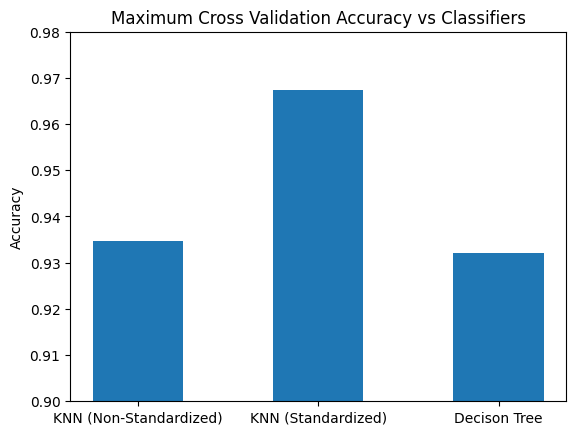

In [ ]:
#plotting cv accuracy of knn and decision tree classifier models

xx = ['KNN (Non-Standardized)','KNN (Standardized)','Decison Tree']
yy = [max(acc_for_features),max(acc_for_features_scaled),max(scores_list)]
plt.bar(xx, yy, width = 0.5)
plt.ylim(0.90,0.98)
plt.ylabel('Accuracy')
plt.title('Maximum Cross Validation Accuracy vs Classifiers')
plt.show()

In [ ]:
#checking test accuracy
#highest accuracy was obtained on standardized data when there were 6 features remaining and at k = 4

from sklearn.metrics import accuracy_score
all_features = set(feature_names)
remaining_features = set(rem_feat)
to_remove = all_features - remaining_features

# print(to_remove)

# removing all features except 6 remaining features from X_train_scaled and X_test_scaled
train_df = pd.DataFrame(data = X_train_scaled, columns = feature_names)
train_df = train_df.drop(to_remove, axis = 1)

test_df = pd.DataFrame(data = X_test_scaled, columns = feature_names)
test_df = test_df.drop(to_remove, axis = 1)

# training and fitting data for the best (knn) classifier model
knn_best = neighbors.KNeighborsClassifier(n_neighbors = k_max)    #k_max = 4 
knn_best.fit(train_df, y_train)

test_acc = accuracy_score(y_test, knn_best.predict(test_df))

print('Test Accuracy: {} %'.format(test_acc*100))

Test Accuracy: 94.73684210526315 %
